# Лабораторная работа 1.3. 
## Метод прогонки для решения трёхдиагональных СЛАУ.

---

Студент: **Шагимарданов Владислав**

Группа: **РК4-92**

Вариант(по журналу): 7

In [118]:
import numpy as np

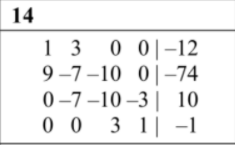

In [119]:
A1 = np.array([[1., 3, 0, 0],
              [9, -7, -10, 0],
              [0, -7, -10, -3],
              [0, 0, 3, 1]])
B1 = np.array([-12., -74, 10, -1])

In [120]:
def forward_move(A, B):
    """
    Прямой ход, вычиляем коэффициенты альфа и бета
    """
    # Подготовим списки с нулями для дальнейшего заполнения
    alpha = [0. for i in range(A.shape[0] - 1)]
    beta = [0. for i in range(B.shape[0])]
    
    # Найдём значения первых коэффициентов
    alpha[0] = - A[0][1] / A[0][0]
    beta[0] = B[0] / A[0][0]
    
    # Цикл для нахождения остальных коэффициентов
    for i in range(1, A.shape[0] - 1):
        alpha[i] = - A[i][i+1] / (A[i][i] + alpha[i-1] * A[i][i-1])
        beta[i] = (B[i] - beta[i-1] * A[i][i-1]) / (A[i][i] + alpha[i-1] * A[i][i-1])
    
    # Остался последний коэфиициент бета
    beta[A.shape[0] - 1] = (B[A.shape[0] - 1] - beta[A.shape[0] - 2] * A[A.shape[0] - 1][A.shape[0] - 2])\
                    / (A[A.shape[0] - 1][A.shape[0] - 1] + alpha[A.shape[0] - 2] * A[A.shape[0] - 1][A.shape[0] - 2])
    return(alpha, beta)

In [121]:
def back_move(alpha, beta, A, B):
    """
    Функция для вычиления решения СЛАУ с помощью обратного хода
    """
    # Будущий список с решениями
    y = [0 for i in range(A.shape[0])]
    
    # Последний коэффициент бета численно равен последнему корню
    y[A.shape[0] - 1] = beta[A.shape[0] - 1]
    
    # Цикл для нахождения остальных корней
    for i in range(A.shape[0] - 2, -1, -1):
        y[i] = alpha[i] * y[i+1] + beta[i]
    
    # Красиво выведем решение
    print('Alpha: ', alpha)
    print('Beta: ', beta)
    print('Корни СЛАУ:', y)

In [122]:
def run_Forest_run(A, B):
    """
    Функция для вывода решения по вводимой СЛАУ
    """
    back_move(forward_move(A, B)[0],forward_move(A, B)[1], A, B)

In [123]:
# Проверим работу функции
run_Forest_run(A1, B1)

Alpha:  [-3.0, -0.29411764705882354, -0.37777777777777777]
Beta:  [-12.0, -1.0, -0.37777777777777777, -1.0]
Корни СЛАУ: [-9.0, -1.0, 0.0, -1.0]
